### import libraries

## Problem Statement
SecureTrust Bank wants to automate loan approval decisions using
Machine Learning to reduce manual effort, bias, and financial risk.

This project builds a classification model to predict whether a loan
application should be Approved (1) or Rejected (0) based on
customer financial and demographic information.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

### Project lookup

In [5]:
data= pd.read_csv("loan_approval_data.csv")

In [6]:
data.columns.nunique()
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [7]:
data.describe()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


In [8]:
data.isnull().sum()

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

## Handling missing values in numerical and categorical

In [10]:
categorical_col=data.select_dtypes(include=["object"]).columns
numerical_col=data.select_dtypes(include=["number"]).columns

In [11]:
categorical_col
numerical_col

Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
num_imputes= SimpleImputer(strategy='mean')
data[numerical_col]=num_imputes.fit_transform(data[numerical_col]);

catg_imputes= SimpleImputer(strategy='most_frequent')
data[categorical_col]=catg_imputes.fit_transform(data[categorical_col]);

In [14]:
data.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [15]:
data.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

### EDA
#### Applicants with higher credit scores and lower DTI ratios show higher loan approval rates.

In [17]:
data["Loan_Approved"].value_counts()

Loan_Approved
No     702
Yes    298
Name: count, dtype: int64

Text(0.5, 1.0, 'Is Loan Approved')

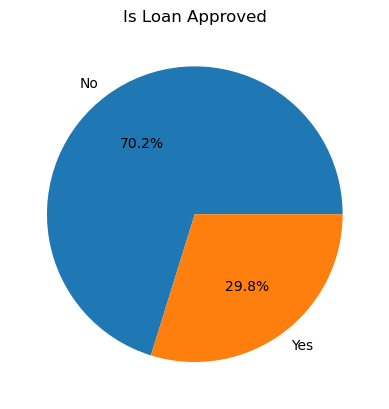

In [18]:
classes_count=data["Loan_Approved"].value_counts()
plt.pie(classes_count,labels=["No","Yes"],autopct="%1.1f%%");
plt.title("Is Loan Approved")

[Text(0, 0, '621'), Text(0, 0, '379')]

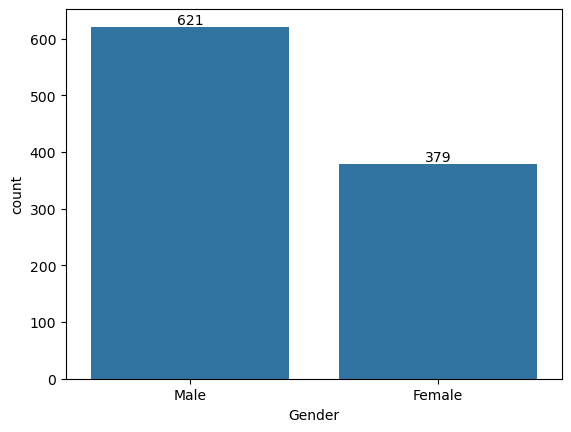

In [19]:
### categorical data analysis
gender_cnt=data["Gender"].value_counts()
ax=sns.barplot(gender_cnt)
ax.bar_label(ax.containers[0])

In [20]:
categorical_col

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')

[Text(0, 0, '643'), Text(0, 0, '357')]

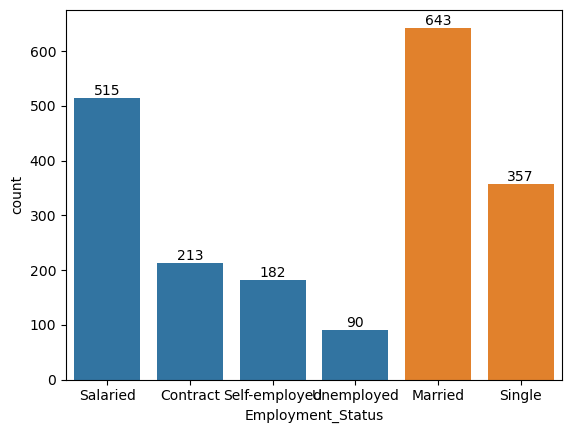

In [21]:
emp_cnt=data["Employment_Status"].value_counts()
ax=sns.barplot(emp_cnt)
ax.bar_label(ax.containers[0])

mt_cnt=data["Marital_Status"].value_counts()
ax=sns.barplot(mt_cnt)
ax.bar_label(ax.containers[1])

##can try for all categorical data

<Axes: xlabel='Applicant_Income', ylabel='Count'>

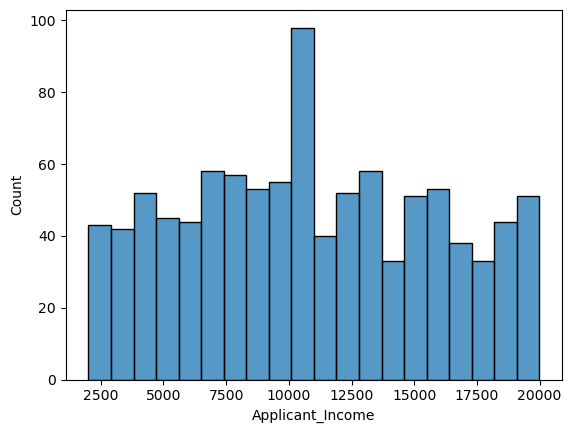

In [22]:
sns.histplot(data = data , bins=20, x="Applicant_Income")

<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

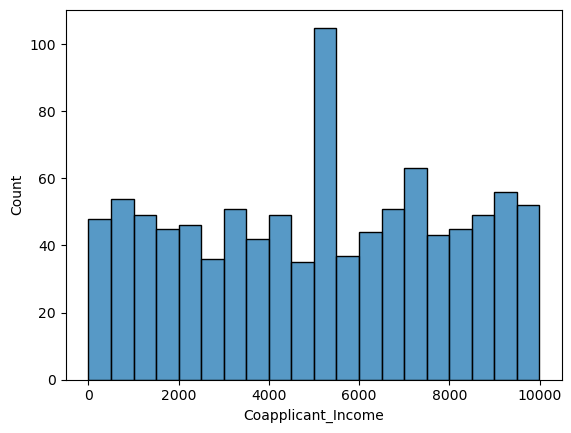

In [23]:
sns.histplot(data = data , bins=20, x="Coapplicant_Income")

<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

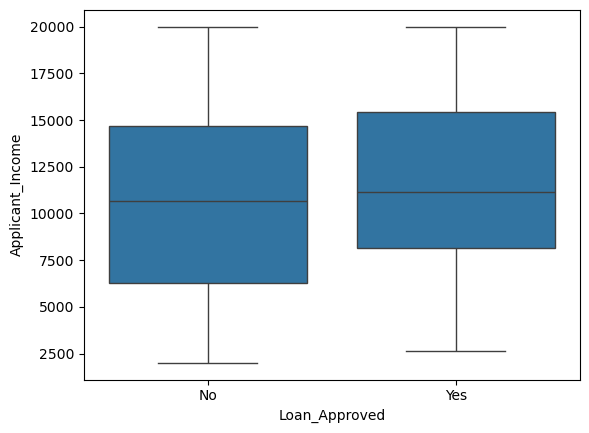

In [24]:
### check for outliers
sns.boxplot(data=data ,x="Loan_Approved",y="Applicant_Income")

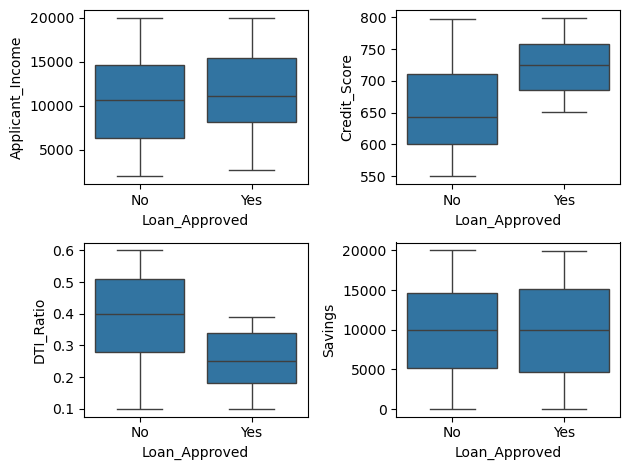

In [25]:
fig,axes=plt.subplots(2,2)
sns.boxplot(ax=axes[0,0],data=data ,x="Loan_Approved",y="Applicant_Income")
sns.boxplot(ax=axes[0,1],data=data ,x="Loan_Approved",y="Credit_Score")
sns.boxplot(ax=axes[1,0],data=data ,x="Loan_Approved",y="DTI_Ratio")
sns.boxplot(ax=axes[1,1],data=data ,x="Loan_Approved",y="Savings")
plt.tight_layout()

<Axes: xlabel='Credit_Score', ylabel='Count'>

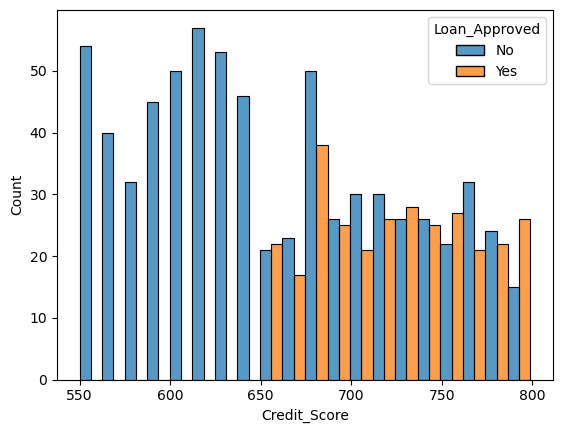

In [26]:
sns.histplot(data = data , bins=20, x="Credit_Score",hue="Loan_Approved",multiple="dodge")
## if cs > 650 then loan approved

In [27]:
###remove un-neccessay parameter
data=data.drop("Applicant_ID",axis=1)

In [28]:
data.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


### Encoding

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_Income    1000 non-null   float64
 1   Coapplicant_Income  1000 non-null   float64
 2   Employment_Status   1000 non-null   object 
 3   Age                 1000 non-null   float64
 4   Marital_Status      1000 non-null   object 
 5   Dependents          1000 non-null   float64
 6   Credit_Score        1000 non-null   float64
 7   Existing_Loans      1000 non-null   float64
 8   DTI_Ratio           1000 non-null   float64
 9   Savings             1000 non-null   float64
 10  Collateral_Value    1000 non-null   float64
 11  Loan_Amount         1000 non-null   float64
 12  Loan_Term           1000 non-null   float64
 13  Loan_Purpose        1000 non-null   object 
 14  Property_Area       1000 non-null   object 
 15  Education_Level     1000 non-null   object 
 16  Gender 

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Education_Level"]=le.fit_transform(data["Education_Level"])  ### Not Graduate	=0/Graduate	=1
data["Loan_Approved"]=le.fit_transform(data["Loan_Approved"])    ### yes=1 /no=0
data.head()

,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,1,Female,Private,0
1,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,0,Male,Private,0
2,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,0,Female,Government,1
3,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,0,Female,Government,0
4,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,0,Male,Private,1


In [32]:
from sklearn.preprocessing import OneHotEncoder

In [33]:
cols=["Employment_Status","Marital_Status","Loan_Purpose","Property_Area","Education_Level","Gender","Employer_Category"]

ohe=OneHotEncoder(sparse_output=False,handle_unknown='ignore',drop="first")
encoded=ohe.fit_transform(data[cols])
encoded

array([[1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [34]:
ohe.get_feature_names_out()
encoded_df=pd.DataFrame(encoded,columns=ohe.get_feature_names_out(),index=data.index)
encoded_df.head()

,Employment_Status_Salaried,Employment_Status_Self-employed,Employment_Status_Unemployed,Marital_Status_Single,Loan_Purpose_Car,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Education_Level_1,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [35]:
### remove old columns and add new columns
data = pd.concat([data.drop(columns=cols), encoded_df], axis=1)

In [36]:
data.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Education_Level_1,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


### co-relation heatmap

In [38]:
num_data = data.select_dtypes(include=["number"])
corr_matrix = (
    num_data.corr()["Loan_Approved"]
    .sort_values(ascending=False)
)
# num_data.corr(),
corr_matrix

Loan_Approved                      1.000000
Credit_Score                       0.451175
Applicant_Income                   0.119796
Employer_Category_MNC              0.069049
Loan_Purpose_Personal              0.034043
Marital_Status_Single              0.030182
Property_Area_Urban                0.025963
Collateral_Value                   0.021868
Coapplicant_Income                 0.004230
Loan_Purpose_Home                  0.002118
Employment_Status_Self-employed   -0.001337
Employer_Category_Private         -0.003347
Property_Area_Semiurban           -0.012967
Savings                           -0.013437
Loan_Purpose_Education            -0.016684
Employer_Category_Unemployed      -0.021468
Age                               -0.022343
Dependents                        -0.023811
Existing_Loans                    -0.034794
Employer_Category_Government      -0.039187
Employment_Status_Salaried        -0.041428
Employment_Status_Unemployed      -0.044464
Education_Level_1               

<Axes: >

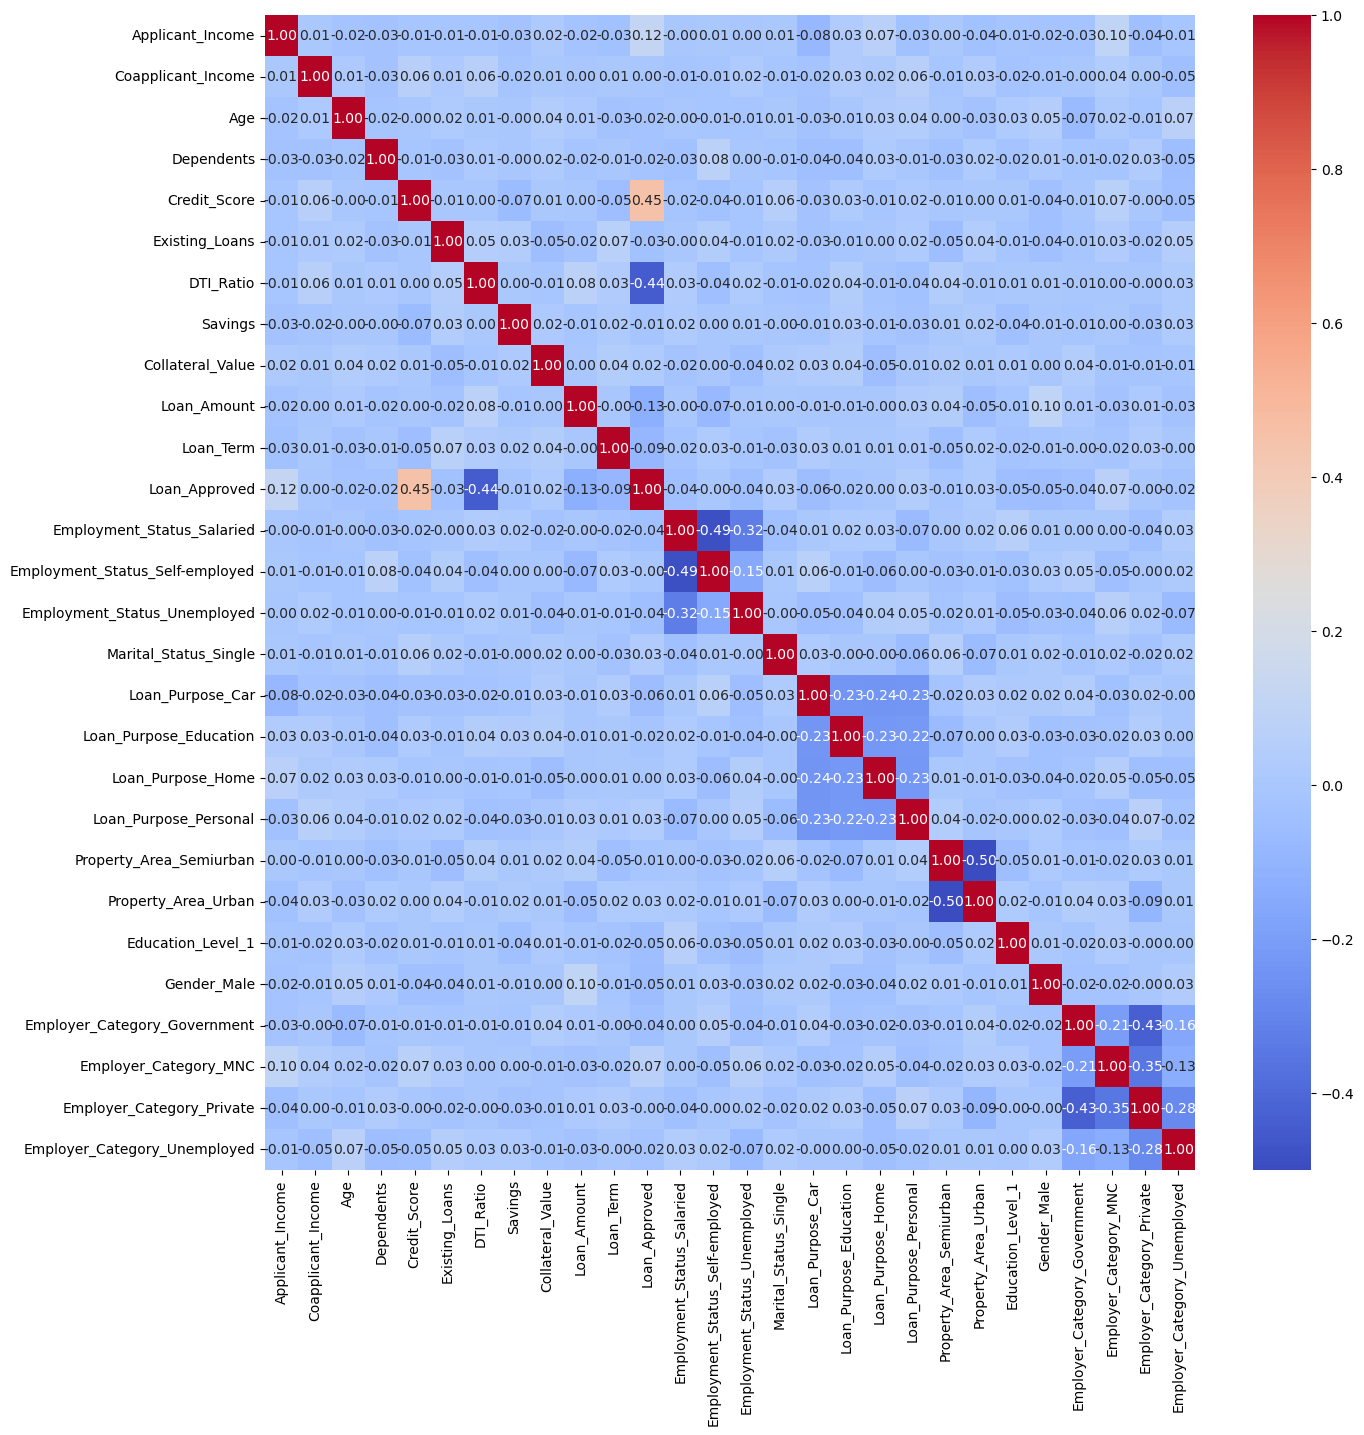

In [39]:
plt.figure(figsize=(15,15))
sns.heatmap(
    num_data.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm"
)

## model splitting
### train -test split

In [41]:
X=data.drop("Loan_Approved",axis=1)
y=data["Loan_Approved"]
X.head()
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Loan_Approved, dtype: int32

In [42]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [43]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
X_train_scaled

array([[-1.01234556e+00,  1.02716377e+00, -8.22511453e-01, ...,
        -4.13887756e-01, -8.59726954e-01, -3.07231582e-01],
       [-1.23639141e+00, -1.59187898e+00,  9.15886794e-01, ...,
        -4.13887756e-01, -8.59726954e-01, -3.07231582e-01],
       [-1.15862490e-02,  1.33606578e+00, -3.65038230e-01, ...,
        -4.13887756e-01,  1.16316000e+00, -3.07231582e-01],
       ...,
       [-2.27277589e-01,  3.50089621e-01, -8.22511453e-01, ...,
        -4.13887756e-01,  1.16316000e+00, -3.07231582e-01],
       [ 1.12970221e+00, -4.64700438e-01,  1.19037073e+00, ...,
        -4.13887756e-01, -8.59726954e-01, -3.07231582e-01],
       [-1.75526629e+00,  1.43417276e-02,  9.40348249e-04, ...,
         2.41611400e+00, -8.59726954e-01, -3.07231582e-01]])

In [45]:
X_test_scaled

array([[ 0.42610546,  0.55091079,  1.19037073, ..., -0.41388776,
         1.16316   , -0.30723158],
       [ 1.00971366,  0.58995935,  0.18392964, ..., -0.41388776,
         1.16316   , -0.30723158],
       [-0.67557096, -0.54558674,  1.09887608, ..., -0.41388776,
         1.16316   , -0.30723158],
       ...,
       [-0.67980585, -0.10106072,  1.28186537, ..., -0.41388776,
         1.16316   , -0.30723158],
       [-0.37650705, -0.97825874, -0.54802752, ..., -0.41388776,
        -0.85972695, -0.30723158],
       [-0.73647272, -1.24497436,  0.73289751, ..., -0.41388776,
         1.16316   , -0.30723158]])

### train and evaluate different model 

#### logistic regression

In [48]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train_scaled,y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0])

In [49]:
from sklearn.metrics import confusion_matrix,classification_report

In [50]:
# Evaluation Metrics for logistic regression 

print("Evaluation Metrics for logistic regression")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("accuracy score: ", accuracy_score(y_test, y_pred)*100)
print("precision score: ", precision_score(y_test, y_pred)*100)
print("recall score: ", recall_score(y_test, y_pred)*100)
print("F1 score: ", f1_score(y_test, y_pred)*100)

Evaluation Metrics for logistic regression
[[126  13]
 [ 14  47]]
accuracy score:  86.5
precision score:  78.33333333333333
recall score:  77.04918032786885
F1 score:  77.68595041322314


### KNN classifier

In [52]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier= KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled,y_train)
y_pred =knn_classifier.predict(X_test_scaled)

# Evaluation Metrics for KNN classifier

print("Evaluation Metrics for KNN classifier")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("accuracy score: ", accuracy_score(y_test, y_pred)*100)
print("precision score: ", precision_score(y_test, y_pred)*100)
print("recall score: ", recall_score(y_test, y_pred)*100)
print("F1 score: ", f1_score(y_test, y_pred)*100)

Evaluation Metrics for KNN classifier
[[120  19]
 [ 29  32]]
accuracy score:  76.0
precision score:  62.745098039215684
recall score:  52.459016393442624
F1 score:  57.14285714285714


### Naive Bayes 

In [54]:
from sklearn.naive_bayes import GaussianNB
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred=nb_model.predict(X_test_scaled)

# Evaluation Metrics for naive bayes

print("Evaluation Metrics for Naive Bayes")
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("accuracy score: ", accuracy_score(y_test, y_pred)*100)
print("precision score: ", precision_score(y_test, y_pred)*100)
print("recall score: ", recall_score(y_test, y_pred)*100)
print("F1 score: ", f1_score(y_test, y_pred)*100)

Evaluation Metrics for Naive Bayes
[[139   0]
 [ 61   0]]
accuracy score:  69.5
precision score:  0.0
recall score:  0.0
F1 score:  0.0


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### best model on the basis of precision==>> Logistic Regression

### Feature engineering

In [57]:
# Add or Transform features
data["DTI_Ratio_sq"] = data["DTI_Ratio"] ** 2
data["Credit_Score_sq"] = data["Credit_Score"] ** 2

# df["Applicant_Income_log"] = np.log1p(df["Applicant_Income"]) if data is screwed 

X = data.drop(columns=["Loan_Approved", "Credit_Score", "DTI_Ratio"])
y = data["Loan_Approved"]

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [58]:
X_train.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Existing_Loans,Savings,Collateral_Value,Loan_Amount,Loan_Term,Employment_Status_Salaried,...,Property_Area_Semiurban,Property_Area_Urban,Education_Level_1,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,DTI_Ratio_sq,Credit_Score_sq
29,5890.000000,8041.0,31.000000,0.0,0.000000,11906.0,8150.000000,29287.000000,12.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0121,363609.000000
535,4779.000000,529.0,50.000000,0.0,0.000000,5369.0,5430.000000,14786.000000,72.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0441,376996.000000
695,10852.571579,8927.0,36.000000,0.0,4.000000,3186.0,24802.792632,20522.825263,48.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0484,341056.000000
557,2384.000000,2113.0,39.971579,1.0,4.000000,11882.0,48542.000000,13312.000000,24.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.1156,527076.000000
836,5228.000000,5249.0,42.000000,1.0,1.950526,17669.0,24802.792632,13906.000000,84.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0324,457021.542187


In [59]:
## logistic model
log_model = LogisticRegression()
log_model.fit(X_train_scaled,y_train)
y_pred = log_model.predict(X_test_scaled)
print("accuracy score: ", accuracy_score(y_test, y_pred)*100)
print("precision score: ", precision_score(y_test, y_pred)*100)
print("recall score: ", recall_score(y_test, y_pred)*100)
print("F1 score: ", f1_score(y_test, y_pred)*100)

accuracy score:  87.5
precision score:  79.03225806451613
recall score:  80.32786885245902
F1 score:  79.67479674796748


In [60]:
### knn classifier
knn_classifier= KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_scaled,y_train)
y_pred =knn_classifier.predict(X_test_scaled)

print("Evaluation Metrics for KNN classifier")

print("accuracy score: ", accuracy_score(y_test, y_pred)*100)
print("precision score: ", precision_score(y_test, y_pred)*100)
print("recall score: ", recall_score(y_test, y_pred)*100)
print("F1 score: ", f1_score(y_test, y_pred)*100)

Evaluation Metrics for KNN classifier
accuracy score:  75.5
precision score:  62.0
recall score:  50.81967213114754
F1 score:  55.85585585585585


In [61]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred = nb_model.predict(X_test_scaled)

print("Evaluation Metrics for Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Precision:", precision_score(y_test, y_pred, zero_division=0)*100)
print("Recall:", recall_score(y_test, y_pred)*100)
print("F1:", f1_score(y_test, y_pred)*100)

Evaluation Metrics for Naive Bayes
Accuracy: 69.5
Precision: 0.0
Recall: 0.0
F1: 0.0


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


#### Model Evaluation Summary

Although Naive Bayes achieved moderate accuracy, it failed to correctly
predict approved loan cases, resulting in zero precision, recall, and F1-score.
This is due to class imbalance and violation of Naive Bayes independence assumptions.

Logistic Regression performed better across all evaluation metrics and
was therefore selected as the final model.

## Conclusion
The Machine Learning model successfully predicts loan approval decisions
using applicant financial and demographic data.

This system can help SecureTrust Bank:
- Reduce manual verification time
- Minimize biased decisions
- Lower financial risk due to wrong approvals

The model acts as a decision-support system before final human verification.